## Certify and install required python modules.

In [1]:
import os
import sys
import subprocess
import pkg_resources

__require = {'casatools', 'casatasks', 'casatestutils', 'panel', 'astropy', 'matplotlib', 'numpy'}
__installed = {pkg.key for pkg in pkg_resources.working_set}
    
__missing = __require - __installed


if len(__missing) > 0:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *__missing], stdout=subprocess.DEVNULL)

In [2]:
!python3 -m casatools --update-user-data

attempting to install/update runtime data in /users/jhoskins/.casa/data
...........


## Utility Functions

In [3]:
def clean_data():
    import os
    
    os.system('rm -rf standard_cube* *.log *.png *.html')

## Stakeholder Dataset

```
Dataset(s) (MOUS)
E2E6.1.00034.S (uid://A002/Xcff05c/X1ec)

Test list:
1c.  SF cube with pcwdT, weighting=briggsbwtaper - E2E6.1.00034.S

Each test stores reference values in dictionaries for the metrics
to be tested and these dictionaries are stored in a single nested dictionary
in a json file located in the casatestdata repository. 
The path of json file is stored in the variable, 
       self.expdict_jsonfile  
in test_tclean_base.setUp(). 

* NOTE for updating the tests and fiducial values in json file *
When the json file is updated and its 'casa_version'
could also be updated then self.refversion in the setUp() needs to be updated to
match with the 'casa_version' as defined in the json file otherwise 
almastkteestutils.read_testcase_expdicts() print an error message.

The fudicial metric values for a specific image are stored with the following keys.
 
For the standard tests, default sets are:
    exp_im_stats, exp_mask_stats, exp_pb_stats, exp_psf_stats,
    exp_model_stats, exp_resid_stats, exp_sumwt_stats
For mosaic tests, the ones above and
    exp_wt_stats (for mosaic)
Additionally, for cube imaging (if self.parallel=True),
    exp_bmin_dict, exp_bmaj_dict, exp_pa_dict
And for mtmfs
    exp_im1_stats, exp_model1_stats, exp_resid1_stats, exp_sumwt1_stats
```

## Load Stakeholder Data

In [4]:
!wget -r -np -nH --cut-dirs=4 --reject "index.html*" https://www.cv.nrao.edu/~jhoskins/E2E6.1.00034.S_tclean.ms.tar
!tar -xvf E2E6.1.00034.S_tclean.ms.tar
os.system('mv E2E6.1.00034.S_tclean.ms data/')

!wget -r -np -nH --cut-dirs=4 --reject "index.html*" https://www.cv.nrao.edu/~jhoskins/test_stk_alma_pipeline_imaging_exp_dicts.json
os.system('cp test_stk_alma_pipeline_imaging_exp_dicts.json ./data/')    

--2022-01-27 11:28:29--  https://www.cv.nrao.edu/~jhoskins/E2E6.1.00034.S_tclean.ms.tar
Resolving www.cv.nrao.edu (www.cv.nrao.edu)... 192.33.115.129
Connecting to www.cv.nrao.edu (www.cv.nrao.edu)|192.33.115.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195870720 (187M) [application/x-tar]
Saving to: ‘E2E6.1.00034.S_tclean.ms.tar’

E2E6.1.00034.S_tcle 100%[===================>] 186.80M   113MB/s    in 1.7s    

2022-01-27 11:28:31 (113 MB/s) - ‘E2E6.1.00034.S_tclean.ms.tar’ saved [195870720/195870720]

FINISHED --2022-01-27 11:28:31--
Total wall clock time: 1.7s
Downloaded: 1 files, 187M in 1.7s (113 MB/s)
E2E6.1.00034.S_tclean.ms/
E2E6.1.00034.S_tclean.ms/ANTENNA/
E2E6.1.00034.S_tclean.ms/ANTENNA/table.dat
E2E6.1.00034.S_tclean.ms/ANTENNA/table.f0
E2E6.1.00034.S_tclean.ms/ANTENNA/table.info
E2E6.1.00034.S_tclean.ms/ANTENNA/table.lock
E2E6.1.00034.S_tclean.ms/ASDM_ANTENNA/
E2E6.1.00034.S_tclean.ms/ASDM_ANTENNA/table.dat
E2E6.1.00034.S_tclean.ms/ASDM_ANT

--2022-01-27 11:28:31--  https://www.cv.nrao.edu/~jhoskins/test_stk_alma_pipeline_imaging_exp_dicts.json
Resolving www.cv.nrao.edu (www.cv.nrao.edu)... 192.33.115.129
Connecting to www.cv.nrao.edu (www.cv.nrao.edu)|192.33.115.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726297 (709K) [application/json]
Saving to: ‘test_stk_alma_pipeline_imaging_exp_dicts.json’

test_stk_alma_pipel 100%[===================>] 709.27K  --.-KB/s    in 0.006s  

2022-01-27 11:28:31 (110 MB/s) - ‘test_stk_alma_pipeline_imaging_exp_dicts.json’ saved [726297/726297]

FINISHED --2022-01-27 11:28:31--
Total wall clock time: 0.06s
Downloaded: 1 files, 709K in 0.006s (110 MB/s)


0

## Enable mpi

In [5]:
parallel = False

## Import Required Dependencies

In [6]:
import casatasks
import casatools
import panel as pn

from astropy.io import fits
from astropy.wcs import WCS

import pylab as pl
import numpy as np

import scripts.test_standard_cube_briggsbwtaper as stk

## User Stakeholder Test

The unit test script is broken into **three** core parts within the notebook.

- Setup
- Modifiable Tests
- Metric Checks and Reporting

### Setup 
The setup section handles setting up the untit test and general class instantiation. In general the user shouldn't have to change this. For those that are developing their own stakeholder test, the setup section would include all the functions required to run the unit tests along with any user defined utility functions specific to their tests.

### Testing
The testing section makes the stakeholder test code available to the user such that they can modify parameters, check their diagnostic and rerun the tests. The tests in the notebook are presented as they are defined in the unit testing script including their default values. **It is recommended that the user restart the kernel and run all after each change**

### Metric Checks and Testing
This section runs the unit tests built in metric code as well as allowing the user to write their won diagnostics code. In addition, the user can access and tweak the values in the 'expected metrics' JSON using the setter/getter functionality.

**Getting**
`new_dict = standard.exp_dict`

**Modifying**
`new_dict['exp_im_stats']['im_rms'][1] = <new value>`

**Setting**
`standard.exp_dict = new_dict`

The user can now rerun the metric test functions and the new dictionay will be used. This will not be the case if the kernel or the testing class is reinstantiated.

## Setup

In [7]:
standard = stk.Test_standard()

standard.set_file_path(path=os.getcwd()+"/data/")

standard.setUp()
standard.test_standard_cube_briggsbwtaper()

Setting data_path: /export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/data/


## Testing

The head(footer) are used with `nbsyc.py` which allows the user to sync change either from `notebook` --> `scipt` or `script` --> `notebook`. The formatting of the headers(footers) is important. There must be a single whitespace after the header and before the footer. Any changes made between the header(footer) will be sync with `nbsync.py`.

In [8]:
msfile = standard.data_path + 'E2E6.1.00034.S_tclean.ms'
file_name = standard.file_name

# %% test_standard_cube_briggsbwtaper_tclean_1 start @

casatasks.tclean(vis=msfile, 
                 imagename=file_name+'0', 
                 field='1',
                 spw=['0'], 
                 imsize=[80, 80], 
                 antenna=['0,1,2,3,4,5,6,7,8'], 
                 scan=['8,12,16'], 
                 intent='OBSERVE_TARGET#ON_SOURCE',
                 datacolumn='data', 
                 cell=['1.1arcsec'], 
                 phasecenter='ICRS 00:45:54.3836 -073.15.29.413', 
                 stokes='I', 
                 specmode='cube',
                 nchan=508, 
                 start='220.2526743594GHz', 
                 width='0.2441741MHz',
                 outframe='LSRK', 
                 pblimit=0.2, 
                 perchanweightdensity=True,
                 gridder='standard', 
                 mosweight=False,
                 deconvolver='hogbom', 
                 usepointing=False, 
                 restoration=False,
                 pbcor=False, 
                 weighting='briggsbwtaper', 
                 restoringbeam='common',
                 robust=0.5, npixels=0, 
                 niter=0, 
                 threshold='0.0mJy', 
                 nsigma=0.0,
                 interactive=0, 
                 usemask='auto-multithresh',
                 sidelobethreshold=1.25, 
                 noisethreshold=5.0,
                 lownoisethreshold=2.0, 
                 negativethreshold=0.0, 
                 minbeamfrac=0.1,
                 growiterations=75, 
                 dogrowprune=True, 
                 minpercentchange=1.0,
                 fastnoise=False, 
                 savemodel='none', 
                 parallel=parallel,
                 verbose=True)

# %% test_standard_cube_briggsbwtaper_tclean_1 end @


{}

In [9]:
print('Copying iter0 files to iter1')
standard.copy_products(file_name+'0', file_name+'1')

casatasks.imstat(standard.file_name + '0.psf')

Copying iter0 files to iter1


{'blc': array([0, 0, 0, 0]),
 'blcf': '00:46:04.574, -73.16.13.397, I, 2.202527e+11Hz',
 'max': array([1.]),
 'maxpos': array([40, 40,  0,  0]),
 'maxposf': '00:45:54.384, -73.15.29.413, I, 2.202527e+11Hz',
 'mean': array([0.00213068]),
 'medabsdevmed': array([0.06809951]),
 'median': array([-0.03720173]),
 'min': array([-0.20378327]),
 'minpos': array([  7,  13,   0, 473]),
 'minposf': '00:46:02.789, -73.15.59.102, I, 2.203682e+11Hz',
 'npts': array([3251200.]),
 'q1': array([-0.09263814]),
 'q3': array([0.06073105]),
 'quartile': array([0.15336919]),
 'rms': array([0.13685789]),
 'sigma': array([0.13684132]),
 'sum': array([6927.26572989]),
 'sumsq': array([60895.2410615]),
 'trc': array([ 79,  79,   0, 507]),
 'trcf': '00:45:44.462, -73.14.46.498, I, 2.203765e+11Hz'}

In [10]:
# %% test_standard_cube_briggsbwtaper_tclean_2 start @

casatasks.tclean(vis=msfile, 
                 imagename=file_name+'1', 
                 field='1',
                 spw=['0'], 
                 imsize=[80, 80], 
                 antenna=['0,1,2,3,4,5,6,7,8'],
                 scan=['8,12,16'], 
                 intent='OBSERVE_TARGET#ON_SOURCE',
                 datacolumn='data', 
                 cell=['1.1arcsec'], 
                 phasecenter='ICRS 00:45:54.3836 -073.15.29.413', 
                 stokes='I', 
                 specmode='cube',
                 nchan=508, 
                 start='220.2526743594GHz', 
                 width='0.2441741MHz',
                 outframe='LSRK', 
                 perchanweightdensity=True,
                 usepointing=False, 
                 pblimit=0.2, 
                 nsigma=0.0,
                 gridder='standard', 
                 mosweight=False, 
                 deconvolver='hogbom', 
                 restoration=True, 
                 restoringbeam='common', 
                 pbcor=True, 
                 weighting='briggsbwtaper', 
                 robust=0.5, 
                 npixels=0, 
                 niter=20000,
                 threshold='0.354Jy', 
                 interactive=0, 
                 usemask='auto-multithresh', 
                 sidelobethreshold=1.25, 
                 noisethreshold=5.0, 
                 lownoisethreshold=2.0, 
                 negativethreshold=0.0,
                 minbeamfrac=0.08, 
                 growiterations=75, 
                 dogrowprune=True,
                 minpercentchange=1.0, 
                 fastnoise=False, 
                 restart=True, 
                 calcres=False, 
                 calcpsf=False, 
                 savemodel='none',
                 parallel=parallel, 
                 verbose=True)

# %% test_standard_cube_briggsbwtaper_tclean_2 end @

{'cleanstate': 'running',
 'cyclefactor': 1.0,
 'cycleiterdone': 0,
 'cycleniter': 20000,
 'cyclethreshold': 0.1810014843940735,
 'interactiveiterdone': 19,
 'interactivemode': False,
 'interactiveniter': 0,
 'interactivethreshold': 0.0,
 'iterdone': 32,
 'loopgain': 0.10000000149011612,
 'maxpsffraction': 0.800000011920929,
 'maxpsfsidelobe': 0.509247362613678,
 'minpsffraction': 0.05000000074505806,
 'niter': 20000,
 'nmajordone': 2,
 'nsigma': 0.0,
 'stopcode': 2,
 'summarymajor': array([15, 32]),
 'summaryminor': array([[  9.        ,  24.        ,  25.        ,  42.        ],
        [  0.51566607,   0.49087879,   0.35147971,   0.35124114],
        [  0.65050554,   0.43279624,   1.6620127 ,   1.08244705],
        [  0.51891911,   0.51891911,   0.354     ,   0.354     ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [254.        , 256.        , 254.        , 256.        ]]),
 'threshold': 0.3540000021457672}

## Produce Standard Cube Report

pstr after checkims = [ check_ims ] Image made : ['/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.psf', '/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.residual', '/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.image', '/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.image.pbcor', '/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.mask', '/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.pb', '/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.model', '/export/home/fornax/jhoskins/Development/environments/notebook/stakeholder/standard_cube_briggsbwtaper.iter1.sumwt'] =  

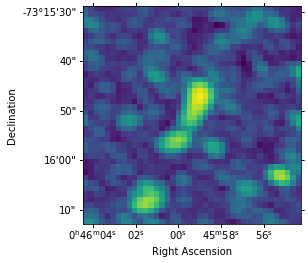

In [11]:
standard.standard_cube_report()

## Clean Data
Uncomment this if you want to clean the working files out of the directory.

In [ ]:
#clean_data()

## Example: Modifying Expected Metrics JSON

In [ ]:
# Getting expected values JSON

import json

new_dict = standard.exp_dict
new_dict_pretty = json.dumps(new_dict, indent=4)

print(new_dict_pretty)

In [ ]:
# Modifying expected values JSON

new_dict['exp_im_stats']['com_bmin'][1] = 6.203

In [ ]:
# Setting expected values JSON

standard.exp_dict = new_dict

exp_dict_pretty = json.dumps(standard.exp_dict, indent=4)

print(exp_dict_pretty)